# Test R Github

In [6]:
suppressMessages(library(ggplot2))
suppressMessages(library(tidyverse))

In [7]:
#Setting seed for reprudicibility 
set.seed(358434829)

# number of observations
n_train <- 500
n_test <- 100
n <- n_train + n_test

In [9]:
# number of regressors
p <- 20

# target number of interaction effects (for simplicity covariates c)
target_int_terms <- 5

# maximum number of factors in interaction effect
int_limit <- 4

interactions <- unique(map(.x = 1:target_int_terms,
                           .f = function(i) sort(sample(x = 1:p, size = sample(2:int_limit), replace = TRUE))))

int_terms <- length(interactions)    

In [12]:
my_mu <- runif(n = p, min = -1, max = 1)
A <- diag(rep(1, times = p))
my_Sigma <- t(A) %*% A

In [13]:
theta <- c(runif(n = p, min = -0.5, max = 0.5), runif(n = int_terms, min = -0.2, max = 0.2))      
print(theta)

 [1]  0.07339208 -0.33186535  0.45395131  0.01876268 -0.18779360 -0.12309211
 [7]  0.25180177 -0.42991212 -0.30912512 -0.15616228 -0.00846771  0.37535189
[13]  0.34466063  0.34905158 -0.23910220  0.27260956  0.07722504 -0.06492965
[19]  0.06668918  0.23657978  0.10079161  0.16725504 -0.15644508  0.16702938
[25] -0.12306892


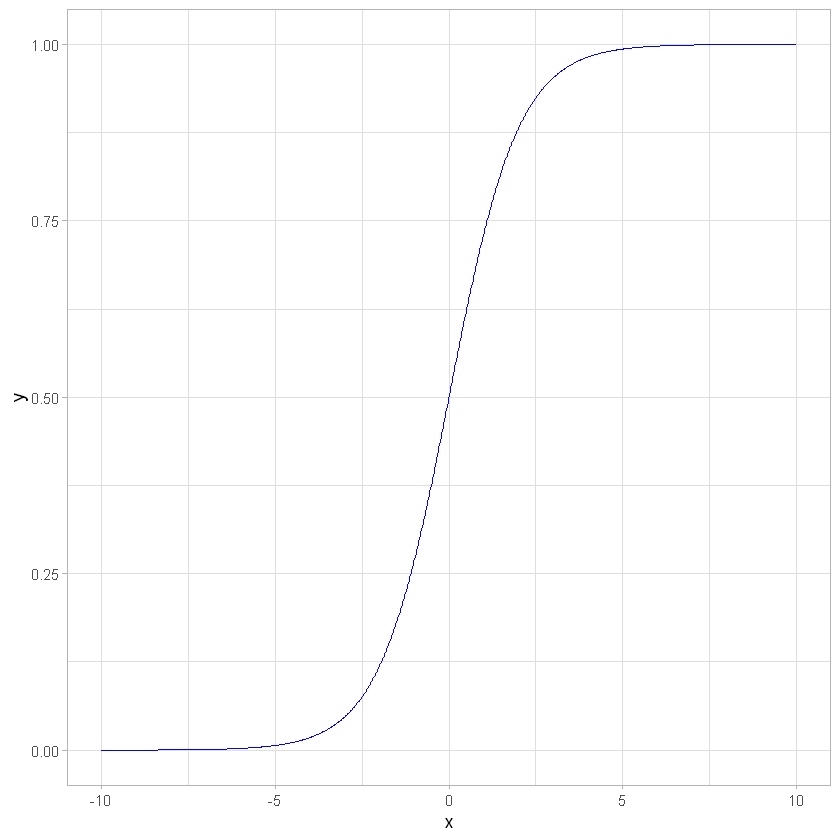

In [14]:
plot_tibble <- tibble(x = seq(-10, 10, length.out = 1000),
                      y = 1/(1+exp(-x)))
ggplot(plot_tibble) +
    geom_line(aes(x=x, y=y), col = "blue") +
    theme_light()

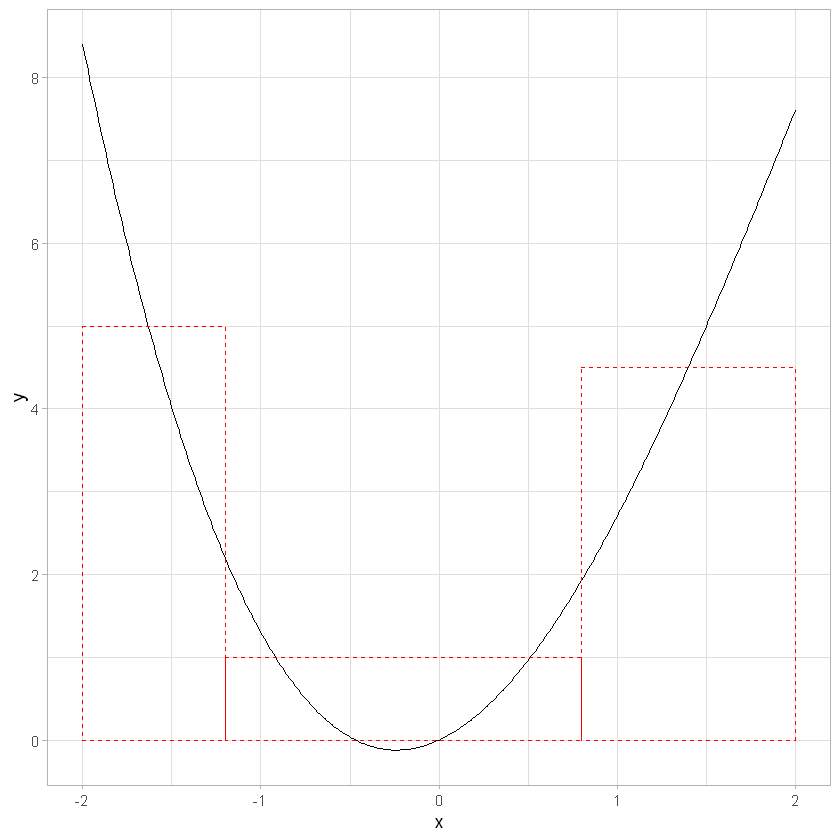

In [18]:
start <- tibble(x = seq(-2, 2, 0.01),
                y = - 0.3*x^3 + 2*x^2 + x)

first_iter <- tibble(x = seq(-2, 2, 0.01),
                     y = c(start$y[start$x <= -1.2] - 5, start$y[(start$x > -1.2) & (start$x <= 0.8)] - 1, start$y[start$x > 0.8] - 4.5))

second_iter <- tibble(x = seq(-2, 2, 0.01),
                      y = c(first_iter$y[start$x <= -1.5] - 1.2, first_iter$y[(start$x > -1.5) & (start$x <= 1.2)] + 0.7, first_iter$y[start$x > 1.2] - 1.3))


p1 <- ggplot(data = start) +
    geom_line(aes(x = x, y = y), size = 0.5) +
    geom_rect(xmin = -2, xmax = -1.2, ymin = 0, ymax = 5, col = "red", fill = NA, size = 0.5, lty = 2) +
    geom_rect(xmin = -1.2, xmax = 0.8, ymin = 0, ymax = 1, col = "red", fill = NA, size = 0.5, lty = 2) +
    geom_rect(xmin = 0.8, xmax = 2, ymin = 0, ymax = 4.5, col = "red", fill = NA, size = 0.5, lty = 2) +
    theme_light()


p1